# Assignmnent 1
# Machine Learning Lab

### By: Parth 21235

### Dataset: Health Insurance Dataset

In [228]:
import pandas as pd 
import numpy as np 

In [229]:
data = pd.read_csv('Health_insurance.csv')

__Exploring Dataset__

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [231]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [232]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [233]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1. Dataset: Health_Insurance
2. features: 7 (age,sex,bmi,children,smoker,region,charges)
3. Target: charges
4. Categorical: 3(sex, children, region)
5. No Null values present( Data wrangling isn't required)

  **Visualization with original data**

In [234]:
import matplotlib.pyplot as plt 
import seaborn as sns  
import plotly.express as px
import plotly.graph_objects as go

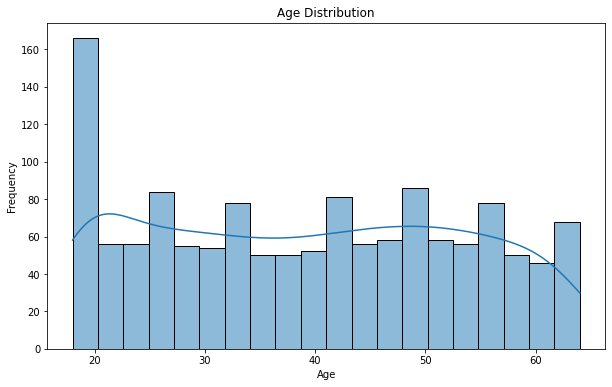

In [235]:
plt.figure(figsize=(10, 6))

sns.histplot(x='age', data=data, kde=True, bins=20)

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [236]:
fig = px.histogram(data, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

*1.**Inferernce:** Distribution seems to be normal for the age feature in dataset except that there is twice the number in 18-19 age group.*

In [237]:
fig = px.box(data, x="sex", y="charges", color="smoker")
fig.show()

*2.**Inference:** Charges are low for the non-smoker community but having few outliers as they paying same as smoker community.*

In [238]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data.age))
fig.add_trace(go.Histogram(x=data.bmi))
fig.update_layout(barmode='stack')
fig.show()

[Inference: BMI is higher in 20-40 years and it decreases with age]

In [239]:
fig = px.pie(data, values='charges', names='region')
fig.show()

[**Inference:**    - Southeast region pays more Insurance charges on an average than any other regions.]

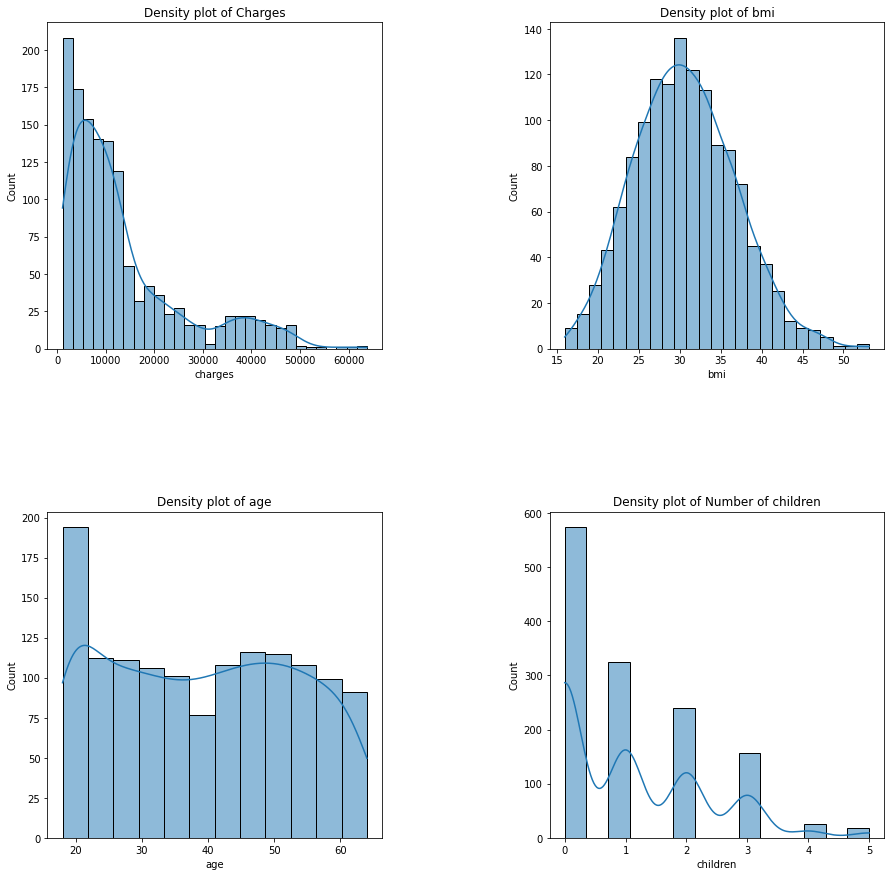

In [240]:
ax= plt.GridSpec(2,2)
ax.update(wspace=0.5, hspace=0.5)

plt.figure(figsize=(15,15))
plt.subplot(ax[0,0])
sns.histplot(data.charges, kde=True).set(title="Density plot of Charges")
plt.subplot(ax[0,1])
sns.histplot(data.bmi, kde=True).set(title="Density plot of bmi")
plt.subplot(ax[1,0])
sns.histplot(data.age, kde=True).set(title= "Density plot of age")
plt.subplot(ax[1,1])
sns.histplot(data.children, kde=True).set(title="Density plot of Number of children")
plt.show()

[**Inference:**
The bmi data appears to be normally distributed with little right skew. More investigation is required.
Our target variable 'charges' is not normally distributed.]

In [241]:
fig = px.box(data, y="charges")
fig.show()

[**Inference:** Outliers could be found in Charges and also it's right skewed]

In [242]:
fig = px.scatter_matrix(data)
fig.show()

**Correlation matrix**

[Original Dataset]

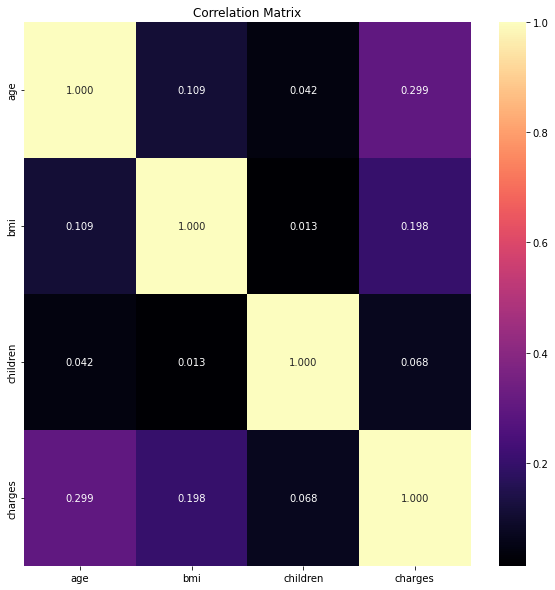

In [243]:
plt.figure(figsize=(10,10))
sns.heatmap(data[data.columns.values].corr(), annot=True, fmt='.3f', cmap='magma')
plt.title('Correlation Matrix')
plt.show()

Pair Plot


[]

<Figure size 2880x2880 with 0 Axes>

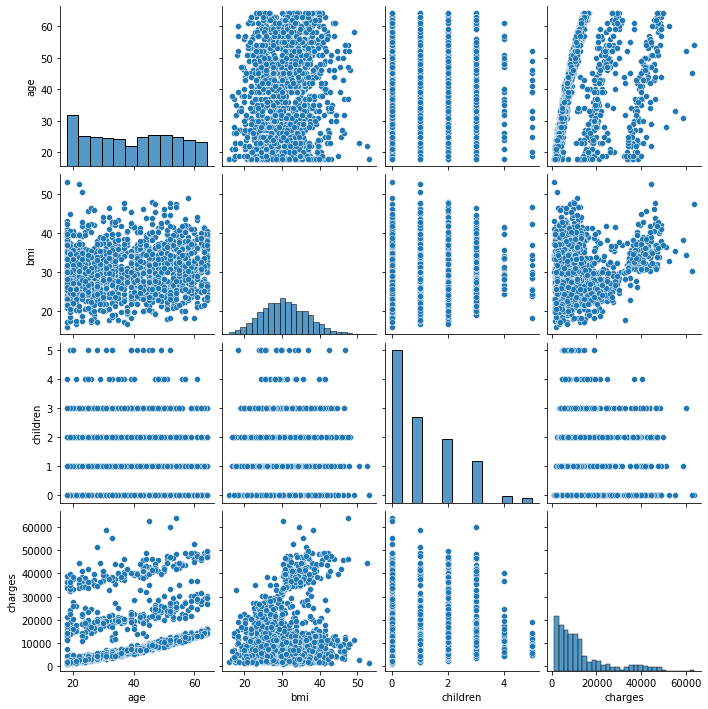

In [244]:
print("Pair Plot")
plt.figure(figsize=(40,40))
sns.pairplot(data)
plt.plot()

**Feature Engineering**

[One Hot Encoding - Categorical to Numerical features]

In [245]:
df= data

In [246]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [247]:
num_pipeline = Pipeline([
    ("std_scaler",StandardScaler())
])
cat_attributes = ["region","sex","smoker"]

full_pipeline = ColumnTransformer([
    ("One-ho",OneHotEncoder(),["region"]),
    ("One-ht",OneHotEncoder(),["sex"]),
    ("One-ot",OneHotEncoder(),["smoker"]),
    
],remainder = 'passthrough')

df_prep = full_pipeline.fit_transform(df)

In [248]:
df = pd.DataFrame(df_prep, columns= ['RSE', 'SWE', 'RNW', 'RNE', 'SM', 'SF', 'SN' , 'SY', 'age' , 'bmi', 'Children', 'Charges'])

In [249]:
df

,RSE,SWE,RNW,RNE,SM,SF,SN,SY,age,bmi,Children,Charges
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,19.0,27.900,0.0,16884.92400
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,18.0,33.770,1.0,1725.55230
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,28.0,33.000,3.0,4449.46200
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,33.0,22.705,0.0,21984.47061
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,31.920,0.0,2205.98080
1335,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,21.0,25.800,0.0,2007.94500


**Feature Scaling**


In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
req_pipeline = Pipeline([
    ("std_scaler",StandardScaler())
])
reqd_attributes = ["bmi","age"]

full_pipeline = ColumnTransformer([
    ("mn",MinMaxScaler(),["bmi"]),
    ("mm",MinMaxScaler(),["age"])    
],remainder = 'passthrough')

df_prep = full_pipeline.fit_transform(df)

In [252]:
df = pd.DataFrame(df_prep, columns= [ 'age' , 'bmi','RSE', 'SWE', 'RNW', 'RNE', 'SM', 'SF', 'SN' , 'SY', 'Children', 'Charges'])

In [253]:
df

,age,bmi,RSE,SWE,RNW,RNE,SM,SF,SN,SY,Children,Charges
0,0.321227,0.021739,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,16884.92400
1,0.479150,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1725.55230
2,0.458434,0.217391,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,4449.46200
3,0.181464,0.326087,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,21984.47061
4,0.347592,0.304348,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.403820,0.695652,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,10600.54830
1334,0.429379,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2205.98080
1335,0.562012,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1629.83350
1336,0.264730,0.065217,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2007.94500


**Correlation Matrix**

[Encoded and Scaled Dataset]

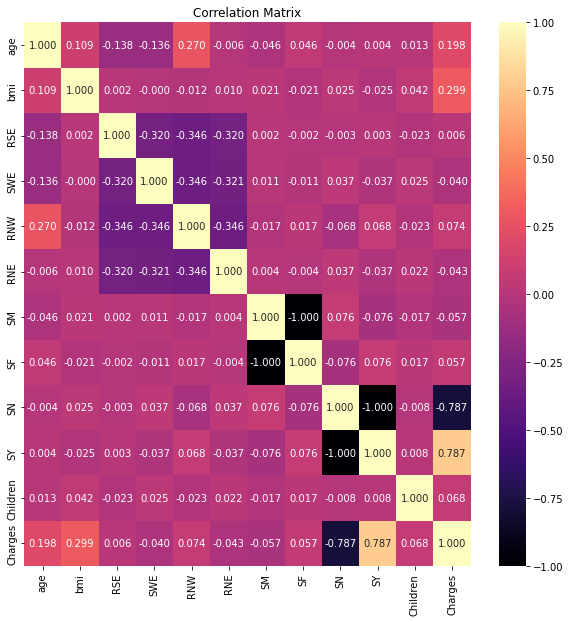

In [254]:
plt.figure(figsize=(10,10))
sns.heatmap(df1[df1.columns.values].corr(), annot=True, fmt='.3f', cmap='magma')
plt.title('Correlation Matrix')
plt.show()

[**Inference:** Sex male and smoker No and Yes are highly correlated with charges]

**Model Building**

In [255]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [256]:
#Best selection method based on RSS
#some helper function 
def fit_linear_reg(X,y):
    #fit linear regression model and return RSS and r squared
    model_k = LinearRegression()
    model_k.fit(X,y)
    RSS = mean_squared_error(y,model_k.predict(X))*len(y) 
    R_squared = model_k.score(X,y) 
    adj_R_squared = 1 - (1-R_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return RSS, R_squared, adj_R_squared 

In [257]:
#import tqdm for progress bar 
from tqdm import tnrange, tqdm_notebook
import itertools

In [258]:
df1= df

#Initialize variables 
y = df1.Charges
X = df1.drop(columns='Charges',axis=1) 

m = 11

RSS_list, R_squared_list, feature_list = [], [], []
adj_R_squared_list = []
num_features = []

#looping over m=1 to m=11 features in X
#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 12 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        num_features.append(len(combo))   

#Store in DataFrame
df2 = pd.DataFrame({'num_features': num_features,
                   'RSS': RSS_list,
                   'R_squared':R_squared_list,
                   'Adj_R_squared': adj_R_squared_list,
                   'features':feature_list})

/tmp/ipykernel_29835/3113329972.py:15: TqdmDeprecationWarning:

Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`



Loop...:   0%|          | 0/11 [00:00<?, ?it/s]

   [subsets using RSS. K-means method]

In [260]:
df_min = df2[df2.groupby('num_features')['RSS'].transform(min) == df2['RSS']]
df_max = df2[df2.groupby('num_features')['R_squared'].transform(max) == df2['R_squared']]
df_max_adj = df2[df2.groupby('num_features')['Adj_R_squared'].transform(max) == df2['Adj_R_squared']]
display(df_min.head())
display(df_max_adj.head(10))

,num_features,RSS,R_squared,Adj_R_squared,features
8,1,7.455432e+10,0.619765,0.619480,"(SN,)"
9,1,7.455432e+10,0.619765,0.619480,"(SY,)"
28,2,5.462612e+10,0.721401,0.720983,"(bmi, SY)"
72,3,4.951322e+10,0.747477,0.746909,"(age, bmi, SN)"
73,3,4.951322e+10,0.747477,0.746909,"(age, bmi, SY)"


,num_features,RSS,R_squared,Adj_R_squared,features
8,1,7.455432e+10,0.619765,0.619480,"(SN,)"
9,1,7.455432e+10,0.619765,0.619480,"(SY,)"
27,2,5.462612e+10,0.721401,0.720983,"(bmi, SN)"
28,2,5.462612e+10,0.721401,0.720983,"(bmi, SY)"
72,3,4.951322e+10,0.747477,0.746909,"(age, bmi, SN)"
73,3,4.951322e+10,0.747477,0.746909,"(age, bmi, SY)"
265,4,4.907845e+10,0.749695,0.748943,"(age, bmi, SN, Children)"
266,4,4.907845e+10,0.749695,0.748943,"(age, bmi, SY, Children)"
587,5,4.893430e+10,0.750430,0.749493,"(age, bmi, RSE, SN, Children)"
588,5,4.893430e+10,0.750430,0.749493,"(age, bmi, RSE, SY, Children)"


In [261]:
selected_features = list(df2.sort_values(by='Adj_R_squared', ascending=False).iloc[0][4])
print(f"Selected features: {selected_features}\nThese features have been selected for the model based on the Adjusted R square value.")

Selected features: ['age', 'bmi', 'RSE', 'SWE', 'SY', 'Children']
These features have been selected for the model based on the Adjusted R square value.


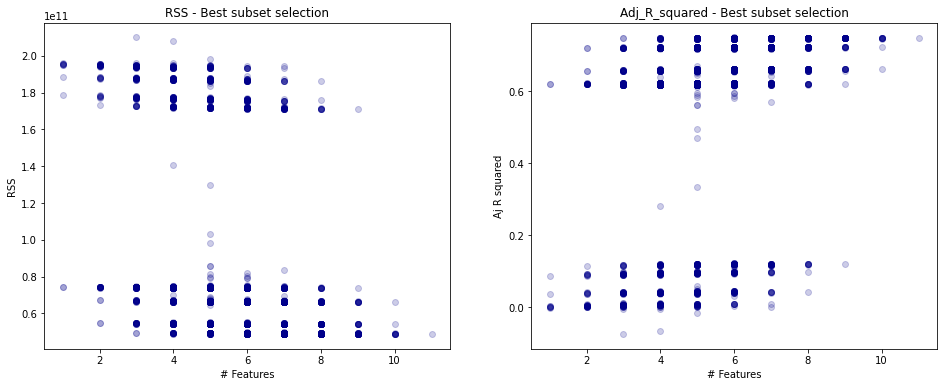

In [275]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df2.num_features,df2.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df2.num_features,df2.Adj_R_squared, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('Aj R squared')
ax.set_title('Adj_R_squared - Best subset selection')

plt.show()

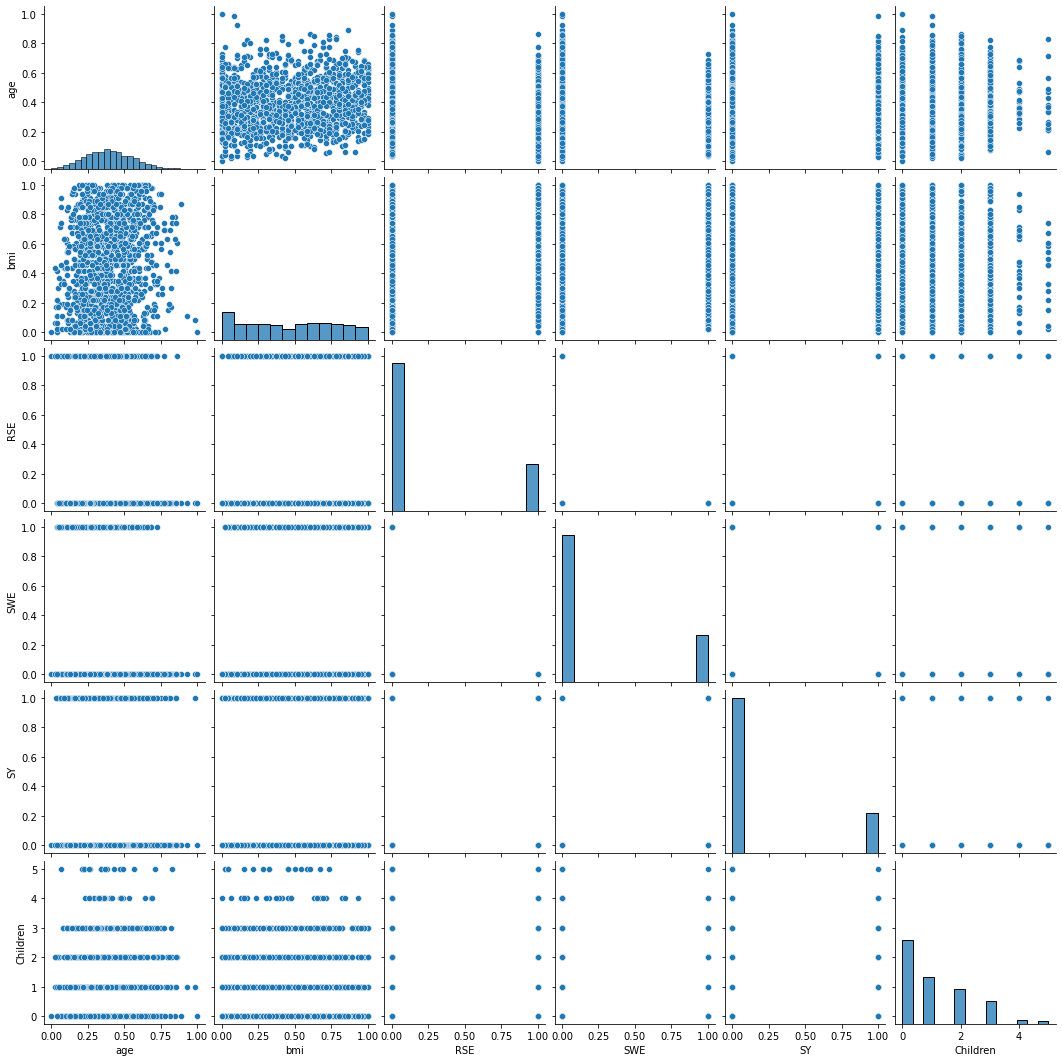

In [276]:
sns.pairplot(df[['age', 'bmi', 'RSE', 'SWE', 'SY', 'Children']])

**Modelling**

In [263]:
# splitting data
from sklearn.model_selection import train_test_split

y = df["Charges"]
X = df[selected_features]



Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, shuffle = True)

In [264]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [265]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, ytrain)

print(f"Score of Training dataset: \t{round(model.score(Xtrain, ytrain)*100,3)}%")
print(f"Score of Test dataset: \t\t{round(model.score(Xtest, ytest)*100,3)}%")

Score of Training dataset: 	74.458%
Score of Test dataset: 		77.378%
